In [1]:
import numpy as np
import pandas as pd
import glob
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
import matplotlib.pyplot as plt


print('---Imports Done---')

---Imports Done---


In [2]:
"""Reading 3 data files into one dataframe"""

path ='/home/divya/Documents/3datasetsdata'# use your path
allFiles = glob.glob(path + "/*.csv")
pred161718 = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    pred161718 = pd.concat(list_)

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [3]:
#Average goals scored at home
avg_goals_scored_home = pred161718['FTHG'].mean()
avg_goals_scored_home

1.5657894736842106

In [4]:
#Average goals scored away
avg_goals_scored_away = pred161718['FTAG'].mean()
avg_goals_scored_away


1.2008771929824562

In [5]:
avg_goals_conceded_home = avg_goals_scored_away
avg_goals_conceded_away = avg_goals_scored_home
avg_goals_conceded_home, avg_goals_conceded_away

(1.2008771929824562, 1.5657894736842106)

In [6]:
pred1920 = pd.read_csv("/home/divya/Documents/2019-2020 epl data.csv")
pred1920.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [7]:
exp_goals_home_team_col=[]
exp_goals_away_team_col=[]

In [8]:
for i in range(pred1920.shape[0]):
    avg_goals_conceded_home_team= pred1920[pred1920['HomeTeam'] == pred1920['HomeTeam'][i]]['FTAG'].mean()
    defense_strength_home_team= avg_goals_conceded_home_team/avg_goals_conceded_home
    avg_goals_scored_away_team= pred1920[pred1920['AwayTeam'] == pred1920['AwayTeam'][i]]['FTAG'].mean()
    attack_strength_away_team= avg_goals_scored_away_team/avg_goals_scored_away
    
    avg_goals_scored_home_team = pred1920[pred1920['HomeTeam'] == pred1920['HomeTeam'][i]]['FTHG'].mean()
    attack_strength_home_team = avg_goals_scored_home_team/avg_goals_scored_home
    avg_goals_conceded_away_team = pred1920[pred1920['AwayTeam'] == pred1920['AwayTeam'][i]]['FTHG'].mean()
    defense_strength_away_team = avg_goals_conceded_away_team/avg_goals_conceded_away
    
    exp_goals_home_team = attack_strength_home_team * defense_strength_away_team * avg_goals_scored_home
    exp_goals_away_team = attack_strength_away_team*defense_strength_home_team*avg_goals_scored_away
    
    exp_goals_home_team_col.append(exp_goals_home_team)
    exp_goals_away_team_col.append(exp_goals_away_team)
    
    print('exp_goals_home_team-',exp_goals_home_team_col)
    print('exp_goals_away_team-',exp_goals_away_team_col)
    print('i---',i)

exp_goals_home_team- [6.7058823529411775]
exp_goals_away_team- [0.4163623082542001]
i--- 0
exp_goals_home_team- [6.7058823529411775, 0.31932773109243695]
exp_goals_away_team- [0.4163623082542001, 8.327246165084002]
i--- 1
exp_goals_home_team- [6.7058823529411775, 0.31932773109243695, 0.9579831932773109]
exp_goals_away_team- [0.4163623082542001, 8.327246165084002, 2.4981738495252004]
i--- 2
exp_goals_home_team- [6.7058823529411775, 0.31932773109243695, 0.9579831932773109, 1.4369747899159664]
exp_goals_away_team- [0.4163623082542001, 8.327246165084002, 2.4981738495252004, 1.2490869247626002]
i--- 3
exp_goals_home_team- [6.7058823529411775, 0.31932773109243695, 0.9579831932773109, 1.4369747899159664, 0.31932773109243695]
exp_goals_away_team- [0.4163623082542001, 8.327246165084002, 2.4981738495252004, 1.2490869247626002, 0.0]
i--- 4
exp_goals_home_team- [6.7058823529411775, 0.31932773109243695, 0.9579831932773109, 1.4369747899159664, 0.31932773109243695, 0.6386554621848739]
exp_goals_away_

In [9]:
pred1920['exp_goals_home_team_col']=exp_goals_home_team_col
pred1920['exp_goals_away_team_col']=exp_goals_away_team_col

In [10]:
preds=pred1920[['FTHG','FTAG','exp_goals_home_team_col','exp_goals_away_team_col']]
preds.columns

Index(['FTHG', 'FTAG', 'exp_goals_home_team_col', 'exp_goals_away_team_col'], dtype='object')

In [11]:
preds['actualResults'] = 0
preds['predResults'] = 0

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
for i in range (len(preds['FTHG'])):
    if preds['FTHG'][i] > preds['FTAG'][i]:
        preds['actualResults'][i] = 'H'
    elif preds['FTHG'][i] < preds['FTAG'][i]:
        preds['actualResults'][i] = 'A'
    elif preds['FTHG'][i] == preds['FTAG'][i]:
        preds['actualResults'][i] = 'D'

print(preds.head(20))  

    FTHG  FTAG  exp_goals_home_team_col  exp_goals_away_team_col  \
0      4     1                 6.705882                 0.416362   
1      0     5                 0.319328                 8.327246   
2      1     1                 0.957983                 2.498174   
3      3     0                 1.436975                 1.249087   
4      0     0                 0.319328                 0.000000   
5      0     3                 0.638655                 3.747261   
6      3     1                 1.915966                 0.416362   
7      0     0                 1.436975                 0.416362   
8      0     1                 0.478992                 0.832725   
9      4     0                 4.789916                 1.249087   
10     2     1                 1.915966                 1.249087   
11     1     2                 1.915966                 1.249087   
12     1     1                 0.319328                 2.498174   
13     1     0                 1.277311         

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/pandas/core/series.py:1218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [13]:
preds['exp_goals_home_team_col_round']= round(preds['exp_goals_home_team_col'],0)
preds['exp_goals_away_team_col_round']= round(preds['exp_goals_away_team_col'],0)

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
for i in range (len(preds['exp_goals_home_team_col_round'])):
    if preds['exp_goals_home_team_col_round'][i] > preds['exp_goals_away_team_col_round'][i]:
        preds['predResults'][i] = 'H'
    elif preds['exp_goals_home_team_col_round'][i] < preds['exp_goals_away_team_col_round'][i]:
        preds['predResults'][i] = 'A'
    elif preds['exp_goals_home_team_col_round'][i] == preds['exp_goals_away_team_col_round'][i]:
        preds['predResults'][i] = 'D'

print(preds.head(20))

    FTHG  FTAG  exp_goals_home_team_col  exp_goals_away_team_col  \
0      4     1                 6.705882                 0.416362   
1      0     5                 0.319328                 8.327246   
2      1     1                 0.957983                 2.498174   
3      3     0                 1.436975                 1.249087   
4      0     0                 0.319328                 0.000000   
5      0     3                 0.638655                 3.747261   
6      3     1                 1.915966                 0.416362   
7      0     0                 1.436975                 0.416362   
8      0     1                 0.478992                 0.832725   
9      4     0                 4.789916                 1.249087   
10     2     1                 1.915966                 1.249087   
11     1     2                 1.915966                 1.249087   
12     1     1                 0.319328                 2.498174   
13     1     0                 1.277311         

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [15]:
prediction = preds[['FTHG','FTAG','exp_goals_home_team_col_round','exp_goals_away_team_col_round','actualResults','predResults']]

In [16]:
prediction['true_false'] = 0

for i in range (len(prediction['actualResults'])):
    if prediction['actualResults'][i] == prediction['predResults'][i]:
        prediction['true_false'][i] = 'True'
    else:
        prediction['true_false'][i] = 'False'

/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/u

In [17]:
prediction.head()

,FTHG,FTAG,exp_goals_home_team_col_round,exp_goals_away_team_col_round,actualResults,predResults,true_false
0,4,1,7.0,0.0,H,H,True
1,0,5,0.0,8.0,A,A,True
2,1,1,1.0,2.0,D,A,False
3,3,0,1.0,1.0,H,D,False
4,0,0,0.0,0.0,D,D,True


In [18]:
results = prediction

In [19]:
from scipy.stats import poisson
prob_goals_home_team = [poisson.pmf(i,exp_goals_home_team_col) for i in range(6)]
prob_goals_away_team = [poisson.pmf(i,exp_goals_away_team_col) for i in range(6)]

In [20]:
#Calculating home win probability
win_home = 0
for i in range(6):
    for j in range(i):
        win_home += prob_goals_home_team[i]*prob_goals_away_team[j]
        #print(i,j,prob_goals_home_team[i]*prob_goals_away_team[j])

#Calculating away win probability
win_away = 0
for i in range(6):
    for j in range(i):
        win_away += prob_goals_away_team[i]*prob_goals_home_team[j]
        #print(i,j,prob_goals_away_team[i]*prob_goals_home_team[j])

#Calculating draw probability
draw = 0
for i in range(6):
        draw += prob_goals_home_team[i]*prob_goals_away_team[i]
win_home,win_away,draw

(array([3.33355214e-01, 1.93975578e-04, 1.23973438e-01, 4.10894708e-01,
        2.73361510e-01, 2.84587216e-02, 7.23604073e-01, 6.25158604e-01,
        1.97877403e-01, 5.53648357e-01, 5.15900728e-01, 5.15900728e-01,
        3.21419291e-02, 5.82005148e-01, 5.05263723e-01, 1.87180927e-02,
        5.74194940e-01, 2.58275439e-01, 1.88401994e-01, 2.58275439e-01,
        6.15858325e-01, 4.07492664e-01, 1.42200546e-01, 5.48454468e-01,
        1.90047813e-01, 3.65671819e-03, 7.21633242e-01, 8.46284516e-04,
        5.09325426e-01, 3.69322257e-01, 1.90047813e-01, 2.92997407e-01,
        4.71943442e-01, 6.68191502e-01, 6.37973855e-01, 1.91859843e-01,
        5.64087118e-01, 3.14070276e-02, 6.14919472e-01, 3.74184452e-01]),
 array([0.0012632 , 0.16180634, 0.66745504, 0.32602998, 0.        ,
        0.72917987, 0.07128468, 0.10573899, 0.41388768, 0.039188  ,
        0.24619295, 0.24619295, 0.80814124, 0.12053567, 0.25857493,
        0.81168766, 0.11435499, 0.37249475, 0.57598051, 0.37249475,
      

In [21]:
#Under 2.5 goals
under_2_5_goals = ((0,0), (1,1), (1,0), (0,1), (2,0), (0,2))
under_2_5_prob = 0
for i in under_2_5_goals:
    under_2_5_prob += prob_goals_home_team[i[0]]*prob_goals_away_team[i[1]]
under_2_5_prob

array([0.02702118, 0.00826416, 0.32903258, 0.49704502, 0.99572051,
       0.18682251, 0.58748436, 0.71629998, 0.85440591, 0.06025104,
       0.38724491, 0.38724491, 0.4652922 , 0.75889239, 0.22938512,
       0.33169971, 0.08853839, 0.81599601, 0.46195203, 0.81599601,
       0.92726255, 0.02382201, 0.74979338, 0.56205619, 0.70702844,
       0.10046037, 0.21214097, 0.03006071, 0.60408951, 0.73310808,
       0.70702844, 0.35730109, 0.97289405, 0.53346459, 0.11799196,
       0.96137296, 0.43292163, 0.30244438, 0.48177318, 0.12027519])

In [22]:
t,f = prediction['true_false'].value_counts()
accuracy = (t/(t+f))*100
print('True -',t,'False -',f)
print('Accuracy%',accuracy)

True - 25 False - 15
Accuracy% 62.5


In [23]:
results = prediction

In [24]:
y_true=[]
for i in range (len(results['actualResults'])):
    y_true.append(results['actualResults'][i])
# y_true = results['Actual']
print(y_true)

['H', 'A', 'D', 'H', 'D', 'A', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'H', 'H', 'A', 'D', 'H', 'D', 'D', 'H', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'D', 'D', 'D', 'H', 'H', 'H', 'D', 'H', 'A', 'H', 'D']


In [25]:
y_pred=[]
for i in range (len(results['predResults'])):
    y_pred.append(results['predResults'][i])
# y_true = results['Actual']
print(y_pred)

['H', 'A', 'A', 'D', 'D', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'D', 'A', 'H', 'D', 'A', 'D', 'H', 'H', 'A', 'H', 'D', 'A', 'H', 'A', 'D', 'D', 'D', 'A', 'H', 'H', 'H', 'D', 'H', 'A', 'H', 'H']


In [26]:
classes = ['H','A','D']

confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])

array([[12,  0,  3],
       [ 3,  8,  2],
       [ 3,  4,  5]])

In [27]:
accuracy_score(y_true,y_pred)

0.625

In [28]:
from sklearn.metrics import precision_recall_fscore_support as score
# classification_report(y_true,y_pred,target_names = classes)

In [29]:
precision,recall,fscore,support=score(y_true,y_pred)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : [0.66666667 0.5        0.66666667]
Recall    : [0.61538462 0.41666667 0.8       ]
F-score   : [0.64       0.45454545 0.72727273]
Support   : [13 12 15]


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(6,6)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
#     accuracy = np.trace(cm_analysis) / float(np.sum(cm_analysis))
#     misclass = 1 - accuracy

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape

    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
                
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,xticklabels = 1,square=True)
#     print(ax.get_ylim())
    ax.set_ylim(3.0, 0)
    ax.set_yticklabels(y_true, va='baseline', rotation = 0, position=(0,0),minor=False)
    plt.savefig(filename)
#     plt.figure(figsize=(5.5,4))
#     sns.heatmap(cm_df, annot=True)
    plt.title('poisson \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

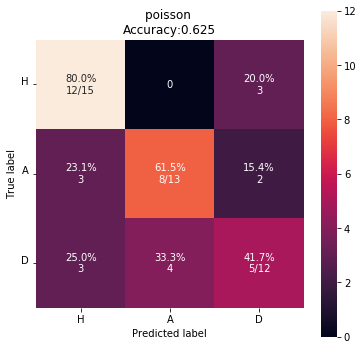

In [31]:
cm_analysis(y_true,y_pred,'conf_matrix',classes)

In [32]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

           H       0.67      0.62      0.64        13
           A       0.50      0.42      0.45        12
           D       0.67      0.80      0.73        15

    accuracy                           0.62        40
   macro avg       0.61      0.61      0.61        40
weighted avg       0.62      0.62      0.62        40

